In [22]:
import numpy as np
import time
import pickle
import os
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.neural_network import MLPClassifier as mlp_classifier

warnings.filterwarnings('ignore')

In [79]:
print("----------------Reading the Data-------------------------")
PATH = os.getcwd()
os.chdir('Alphabets/')

X_train = pd.read_csv('train.csv', sep=',', header=None, index_col=False)
X_test = pd.read_csv('test.csv', sep=',', header=None, index_col=False)
np.random.shuffle(X_train.to_numpy())
train_class = X_train[X_train.columns[-1]]
test_actual_class = X_test[X_test.columns[-1]]

X_train = X_train.drop(X_train.columns[-1], axis=1)
X_test = X_test.drop(X_test.columns[-1], axis=1)

print("----------------Data Reading completed-------------------")

os.chdir('../')

X_train = X_train/255
X_test = X_test/255

m = X_train.shape[0] # Number of Training Samples
n = X_train.shape[1] # Number of input features

print("The total number of training samples = {}".format(m))
print("The number of features = {}".format(n))

----------------Reading the Data-------------------------
----------------Data Reading completed-------------------
The total number of training samples = 13000
The number of features = 784


In [80]:
#To get the one hot encoding of each label
print("--------Perform 1-hot encoding of class labels------------")

train_class_enc = pd.get_dummies(train_class).to_numpy()
test_actual_class_enc = pd.get_dummies(test_actual_class).to_numpy()

--------Perform 1-hot encoding of class labels------------


In [158]:
clf = mlp_classifier(hidden_layer_sizes=(100, 100), activation='relu', solver='sgd', 
                     batch_size=100, learning_rate_init=0.1, learning_rate='constant', 
                     power_t=(1/3), tol=1e-8, verbose=True)

In [159]:
start =time.time()
clf.fit(X_train, train_class_enc)
end = time.time()

Iteration 1, loss = 2.20550584
Iteration 2, loss = 0.83341864
Iteration 3, loss = 0.63740725
Iteration 4, loss = 0.53512449
Iteration 5, loss = 0.47428796
Iteration 6, loss = 0.41367800
Iteration 7, loss = 0.36544569
Iteration 8, loss = 0.33383919
Iteration 9, loss = 0.30328265
Iteration 10, loss = 0.29008946
Iteration 11, loss = 0.26207687
Iteration 12, loss = 0.27863789
Iteration 13, loss = 0.24218303
Iteration 14, loss = 0.25511629
Iteration 15, loss = 0.25120757
Iteration 16, loss = 0.19450804
Iteration 17, loss = 0.21741455
Iteration 18, loss = 0.20776945
Iteration 19, loss = 0.21060039
Iteration 20, loss = 0.23535006
Iteration 21, loss = 0.25155844
Iteration 22, loss = 0.23025999
Iteration 23, loss = 0.21066086
Iteration 24, loss = 0.23564499
Iteration 25, loss = 0.22345602
Iteration 26, loss = 0.20373446
Iteration 27, loss = 0.23385834
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


In [160]:
print(clf.loss_)
# print(clf.intercepts_)
# print(clf.coefs_)
print(clf.out_activation_)


0.23385833876268233
logistic


In [161]:
print("The time taken to train the model using MLP classifier is = {:2.3f}sec".format(end-start))
print("The test accuracy of the model ={:2.3f}%".format(clf.score(X_test, test_actual_class_enc)*100))

The time taken to train the model using MLP classifier is = 31.280sec
The test accuracy of the model =83.769%


In [84]:
print("The time taken to train the model using MLP classifier is = {:2.3f}sec".format(end-start))
print("The test accuracy of the model ={:2.3f}%".format(clf.score(X_test, test_actual_class_enc)*100))

The time taken to train the model using MLP classifier is = 83.778sec
The test accuracy of the model =88.185%


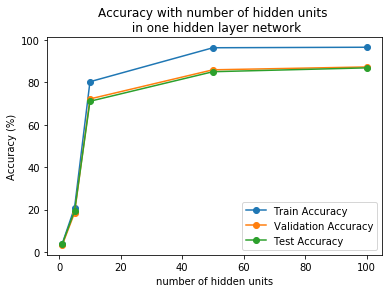

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Accuracy with number of hidden units \n in one hidden layer network")
ax.plot(arch_test, train_accuracy, marker='o', label='Train Accuracy')
ax.plot(arch_test, valid_accuracy, marker='o',label='Validation Accuracy')
ax.plot(arch_test, test_accuracy, marker='o', label='Test Accuracy')
ax.set_xlabel("number of hidden units")
ax.set_ylabel("Accuracy (%)")

plt.legend()
#plt.savefig("accuracy_HiddenUnit_val20per.png", dpi=1000, bbox_inches='tight')
plt.show()

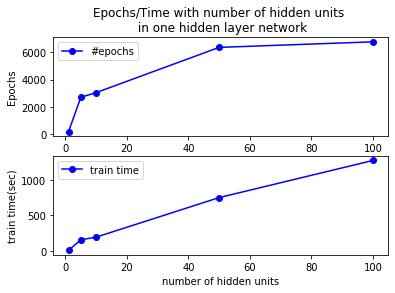

In [55]:
fig = plt.figure()
ax = fig.add_subplot(211)
plt.title("Epochs/Time with number of hidden units \n in one hidden layer network")
ax.plot(arch_test, epochs, c='b', marker='o', label='#epochs')
ax.set_xlabel("number of hidden units")
ax.set_ylabel("Epochs")
ax.legend()

ax1 = fig.add_subplot(212)
ax1.plot(arch_test, train_time, c='b', marker='o', label='train time')
ax1.set_xlabel("number of hidden units")
ax1.set_ylabel("train time(sec)")
plt.legend()
#plt.savefig("epochs_time_HiddenUnit_val20per.png", dpi=1000, bbox_inches='tight')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Accuracy with number of epochs for \n 1 hidden layer of 100 units")
ax.plot(plt_epoch, plt_train_acc, c='b', label='Train Accuracy')
ax.plot(plt_epoch, plt_val_acc, c='m',label='Validation Accuracy')
ax.plot(plt_epoch, plt_test_acc, c='g', label='Test Accuracy')
ax.set_xlabel("number of epochs")
ax.set_ylabel("Accuracy (%)")

plt.legend()
#plt.savefig("accuracy_epoch_100_valloss.png", dpi=1000, bbox_inches='tight')
plt.show()